In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [8]:
df = pd.read_csv('stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
numerical_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include='object').columns


In [15]:
#Feature Engineering

#Create total_score & average_score:

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3


<Axes: xlabel='average_score', ylabel='Count'>

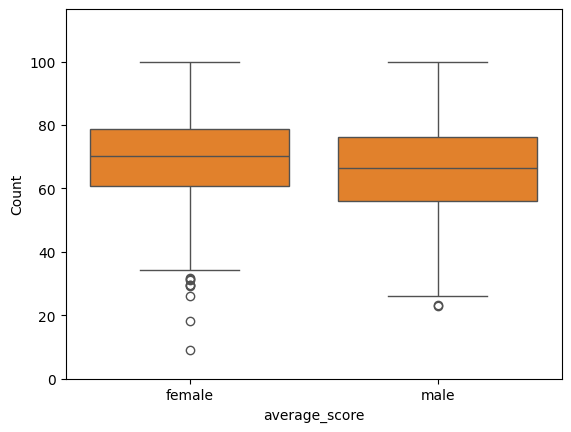

In [16]:
sns.histplot(df['average_score'])
sns.boxplot(x='gender', y='average_score', data=df)


In [17]:
#Data Preprocessing & Pipelines

#Separate features (X) and target (y):

X = df.drop(['total_score','average_score'], axis=1)
y = df['average_score']


In [20]:
#Handle categorical & numerical features:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numeric_features)
])


ModuleNotFoundError: No module named 'sklearn'